### Packages

In [151]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('seaborn')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/callum/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/callum/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [152]:
all_years = pd.read_csv('fed_speeches_1996_2021.csv')

### Use NLTK to score the speeches

We use VADER (Valence Aware Dictionary and sEntiment Reasoner), to score the sentiment of the texts.
As shown in the examples below, +1.0 represents the most positive sentiment and -1.0 the most negative.

In [153]:
analyzer = SentimentIntensityAnalyzer()

def score_text(text):
    sentence_list = tokenize.sent_tokenize(text)
    cscore = 0.0
    
    for sent in sentence_list:
        sentence_score = analyzer.polarity_scores(sent)['compound']
        cscore += sentence_score
    return cscore / len(sentence_list)

In [154]:
score_text("The market is awful")

-0.4588

In [155]:
score_text("The market looks really positive")

0.5984

In [156]:
sample_speech = all_years.loc[[0]].text[0]
score_text(sample_speech)

0.07480212765957447

In [157]:
all_years['sentiment'] = all_years.text.map(lambda t : score_text(t))

### Data Analysis and Visualisation

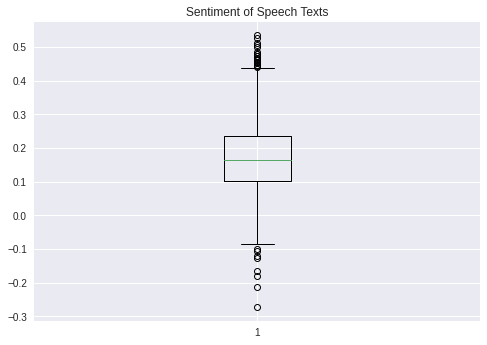

In [158]:
fig1, ax1 = plt.subplots()
ax1.set_title("Sentiment of Speech Texts")
ax1.boxplot(all_years.sentiment)
plt.show()

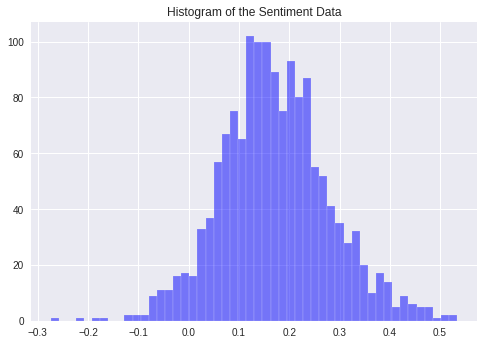

In [163]:
num_bins = 50
n, bins, patches = plt.hist(all_years.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.title("Histogram of the Sentiment Data")
plt.show()

In [165]:
# Make plot of dates against sentiment